In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
# Create a new folder
os.mkdir('/content/gdrive/My Drive/AmazonReviews')


In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/bittlingmayer/amazonreviews"
data = od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ace991
Your Kaggle Key: ··········


100%|██████████| 493M/493M [00:04<00:00, 125MB/s]


In [ ]:
import bz2
import pandas as pd

# Specify the file path
file_path = '/content/amazonreviews/train.ft.txt.bz2'

# Open the compressed file
with bz2.open(file_path, 'rt') as file:
    # Read the contents of the file
    file_contents = file.read()

# Create a DataFrame from the file contents
df = pd.DataFrame([line.strip() for line in file_contents.split('\n')], columns=['Text'])
df[['label', 'text']] = df['Text'].str.split(' ', 1, expand=True)
df = df.drop(columns=['Text'])
df['label'] = df['label'].str.strip()
df['text'] = df['text'].str.strip()
# Print the first few rows of the DataFrame
df.head()


<ipython-input-9-f4c626a75cf3>:14: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['label', 'text']] = df['Text'].str.split(' ', 1, expand=True)


,label,text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."


In [ ]:
# Specify the test file path
file_path = '/content/amazonreviews/test.ft.txt.bz2'

# Open the compressed file
with bz2.open(file_path, 'rt') as file:
    # Read the contents of the file
    file_contents = file.read()
# Create a DataFrame from the file contents
df_test = pd.DataFrame([line.strip() for line in file_contents.split('\n')], columns=['Text'])
df_test[['label', 'text']] = df_test['Text'].str.split(' ', 1, expand=True)
df_test = df_test.drop(columns=['Text'])
df_test['label'] = df_test['label'].str.strip()
df_test['text'] = df_test['text'].str.strip()
# Print the first few rows of the DataFrame
df_test.head()



<ipython-input-10-50efcbf51f17>:10: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_test[['label', 'text']] = df_test['Text'].str.split(' ', 1, expand=True)


,label,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [ ]:
df.sample(5)

In [ ]:
df['label'].value_counts()

__label__2    1800000
__label__1    1800000
                    1
Name: label, dtype: int64

In [ ]:
df_test['label'].value_counts()

__label__2    200000
__label__1    200000
                   1
Name: label, dtype: int64

In [ ]:
df = df.drop(df.index[-1])
df_test = df_test.drop(df_test.index[-1])

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
df.label = label_encoder.fit_transform(df.label)
df_test.label = label_encoder.fit_transform(df_test.label)

In [ ]:
length_reviews = df.text.str.len()
print(max(length_reviews))
print(min(length_reviews))

1015
72


In [ ]:
df['label'].value_counts()

1    1800000
0    1800000
Name: label, dtype: int64

In [ ]:
df_test['label'].value_counts()

1    200000
0    200000
Name: label, dtype: int64

In [ ]:
import re
from tqdm import tqdm

def normalize(texts):
  """Removes non-alphanumeric characters, digits, and reduce extra white spaces"""
  # Regular expression patterns for removing non-alphanumeric characters and digits
  pattern_non_alnum = re.compile(r'[^a-z0-9\s]', re.IGNORECASE)
  pattern_digits = re.compile(r'\d')


  normalized_texts = []
  for text in tqdm(texts, desc="Normalizing texts"):
    # Convert to lowercase
      text = text.lower()

      # Remove non-alphanumeric characters
      text = pattern_non_alnum.sub(' ', text)

      # Remove digits
      text = pattern_digits.sub('', text)

      # Remove extra white spaces
      text = re.sub(r'\s+', ' ', text).strip()

      normalized_texts.append(text)

  return normalized_texts


In [ ]:
df['text']=normalize(df['text'])
df_test['text']=normalize(df_test['text'])

Normalizing texts: 100%|██████████| 400000/400000 [00:24<00:00, 16630.14it/s]


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from tqdm import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

preprocessed_texts = []
for text in tqdm(df['text'], desc="Preprocessing text"):
    preprocessed_text = preprocess_text(text)
    preprocessed_texts.append(preprocessed_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Preprocessing text: 100%|██████████| 3600000/3600000 [48:42<00:00, 1231.82it/s]


In [ ]:
preprocessed_test = []
for text in tqdm(df_test['text'], desc="Preprocessing text"):
    preprocessed_text = preprocess_text(text)
    preprocessed_test.append(preprocessed_text)


Preprocessing text: 100%|██████████| 400000/400000 [05:52<00:00, 1135.29it/s]


In [ ]:
print(df.text.iloc[-1])
print(len(df.text.iloc[-1]))

makes my blood run red white and blue i agree that every american should read this book and everybody else for that matter i don t agree that it s scholarly rather it s a joy to read easy to understand even for a person with two master s degrees between mcelroy s chapter on how american culture was formed and ken burns lewis clark i don t know which makes my blood run red white and bluer and as a child of the anti establishment s it s done a lot toward helping me understand why we americans do what we do it s the best history book i ve ever read the best history course i ve ever taken or taught i m buying it for my home library for my grandchildren to use as a resource we re also using it as a resource for a book on urban planning
740


In [ ]:
print(preprocessed_texts[-1])
print(len(preprocessed_texts[-1]))

make blood run red white blue agree every american read book everybody else matter agree scholarly rather joy read easy understand even person two master degree mcelroy chapter american culture formed ken burn lewis clark know make blood run red white bluer child anti establishment done lot toward helping understand american best history book ever read best history course ever taken taught buying home library grandchild use resource also using resource book urban planning
476


In [ ]:
df['text'] = preprocessed_text

In [ ]:
df_test['text'] = preprocessed_test

In [ ]:
import pickle

label = df['label']
# Save the list to a file
with open('/content/gdrive/My Drive/AmazonReviews/label.pkl', 'wb') as file:
    pickle.dump(label, file)

In [ ]:
# Save the list to a file
test_label = df_test['label']
with open('/content/gdrive/My Drive/AmazonReviews/test_label.pkl', 'wb') as file:
    pickle.dump(test_label, file)

### **Next**
Files have been saved and loaded again for later use and clearing RAM.

In [ ]:
import pickle

# Specify the path to the pickle file
file_path = '/content/gdrive/My Drive/AmazonReviews/label.pkl'

# Load the pickle file
with open(file_path, 'rb') as file:
    label = pickle.load(file)

# Print the loaded data
print(label[:3])


0    1
1    1
2    1
Name: label, dtype: int64


In [ ]:
# Specify the path to the pickle file
file_path = '/content/gdrive/My Drive/AmazonReviews/test_label.pkl'

# Load the pickle file
with open(file_path, 'rb') as file:
    test_label = pickle.load(file)

# Print the loaded data
print(test_label[:3])


0    1
1    1
2    0
Name: label, dtype: int64


In [ ]:
# Specify the path to the pickle file
file_path = '/content/gdrive/My Drive/AmazonReviews/file.pkl'

# Load the pickle file
with open(file_path, 'rb') as file:
    text = pickle.load(file)

# Print the loaded data
print(text[:3])


['stuning even non gamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen', 'best soundtrack ever anything reading lot review saying best game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening year beauty simply refuse fade price tag pretty staggering must say going buy cd much money one feel would worth every penny', 'amazing soundtrack favorite music time hand intense sadness prisoner fate mean played game hope distant promise girl stole star important inspiration personally throughout teen year higher energy track like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb well soundtrack amazing music probably best composer work heard xenogears soundtrack say 

In [ ]:
# Specify the path to the pickle file
file_path = '/content/gdrive/My Drive/AmazonReviews/file_test.pkl'

# Load the pickle file
with open(file_path, 'rb') as file:
    test = pickle.load(file)

# Print the loaded data
print(test[:3])

['great cd lovely pat one great voice generation listened cd year still love good mood make feel better bad mood evaporates like sugar rain cd ooze life vocal jusat stuunning lyric kill one life hidden gem desert isle cd book never made big beyond everytime play matter black white young old male female everybody say one thing singing', 'one best game music soundtrack game really play despite fact played small portion game music heard plus connection chrono trigger great well led purchase soundtrack remains one favorite album incredible mix fun epic emotional song sad beautiful track especially like many kind song video game soundtrack must admit one song life distant promise brought tear eye many occasion one complaint soundtrack use guitar fretting effect many song find distracting even included would still consider collection worth', 'battery died within year bought charger jul worked ok design nice convenient however year battery would hold charge might well get alkaline disposable 

Using 100 million words to form a cloud.

In [ ]:
df_1 = df[df['label'] == 1]
df_0 = df[df['label'] == 0]

In [ ]:
df_1_text = ' '.join(df_1['text'])
df_0_text = ' '.join(df_0['text'])
print(len(df_1_text))
print(len(df_0_text))

461451684
485927777


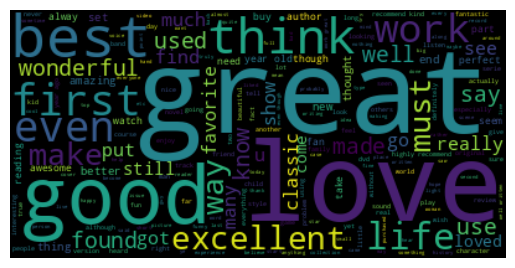

In [ ]:
from wordcloud import WordCloud,STOPWORDS

import matplotlib.pyplot as plt

stop_words = set(STOPWORDS)
stop_words.update(['book','read','time','movie','film','album','cd','product','one','s','song','music','story','books','bought'])
cloud_amazon = WordCloud(stopwords=stop_words).generate(df_1_text[:100000000])
plt.imshow(cloud_amazon, interpolation='bilinear')

plt.axis('off')
plt.show()

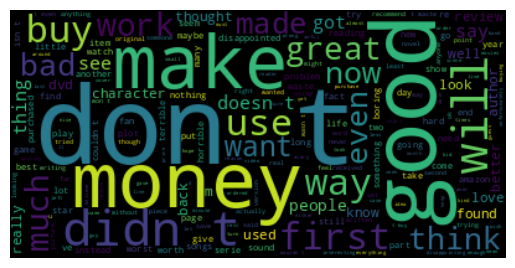

In [ ]:
cloud_amazon = WordCloud(stopwords=stop_words).generate(df_0_text[:100000000])
plt.imshow(cloud_amazon, interpolation='bilinear')

plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Create an instance of CountVectorizer
vectorizer = TfidfVectorizer(max_features=12500)

# Fit the vectorizer to the corpus and transform the corpus into a document-term matrix
X_train = vectorizer.fit_transform(text)
y_train = label

X_test = vectorizer.transform(test)
y_test = test_label

# Get the feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print(feature_names[:50])


['aa' 'aaa' 'aaliyah' 'aaron' 'ab' 'abandon' 'abandoned' 'abba' 'abbey'
 'abby' 'abc' 'ability' 'able' 'ablum' 'aboard' 'abomination' 'abortion'
 'abound' 'abraham' 'abrasive' 'abridged' 'abroad' 'abrupt' 'abruptly'
 'absence' 'absent' 'absolute' 'absolutely' 'absolutley' 'absolutly'
 'absorb' 'absorbed' 'absorbent' 'absorbing' 'abstract' 'absurd'
 'absurdity' 'abundance' 'abundant' 'abuse' 'abused' 'abusive' 'abysmal'
 'ac' 'academia' 'academic' 'academy' 'accent' 'accept' 'acceptable']


In [ ]:
print(feature_names)

['aa' 'aaa' 'aaliyah' ... 'zoo' 'zoom' 'zune']


In [ ]:
# Save the list to a file
with open('/content/gdrive/My Drive/AmazonReviews/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [ ]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters
num_clusters = 5  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to your data
y_preds = kmeans.fit(X_train)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Print the cluster labels and centers
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(f"Cluster Center: {cluster_centers[i]}")
    print(f"Data Points: {X_train[cluster_labels == i]}")
    print("-------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
Cluster Center: [2.74449998e-05 2.07524651e-05 5.88922993e-05 ... 9.51936488e-05
 6.96976082e-05 1.44131940e-05]
Data Points:   (0, 10133)	0.16496785140882594
  (0, 10814)	0.1256007847956193
  (0, 90)	0.21231241579561347
  (0, 10915)	0.14190772986965725
  (0, 108)	0.11185562542178072
  (0, 7028)	0.17207585352112442
  (0, 9067)	0.16437868032693911
  (0, 7123)	0.12519271804121715
  (0, 6315)	0.1262777464122517
  (0, 5949)	0.1708090555835241
  (0, 1930)	0.3091701834223272
  (0, 10188)	0.35241071396498846
  (0, 7361)	0.14049756321994855
  (0, 10746)	0.31280819544701494
  (0, 435)	0.12328049494080875
  (0, 789)	0.12884060646686685
  (0, 680)	0.12465138494991423
  (0, 7203)	0.3726114913006374
  (0, 6129)	0.11624762610987187
  (0, 3444)	0.4021671257563561
  (0, 11216)	0.09131975332605664
  (0, 12464)	0.11238399859987164
  (0, 803)	0.08145607722034735
  (0, 10539)	0.08581267137717748
  (0, 7247)	0.1676154533267289
  :	:
  (234442, 11552)	0.12302694215777488
  (234442, 3755)	0.145796

In [ ]:
# Save the model to a file
with open('/content/gdrive/My Drive/AmazonReviews/Kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [ ]:
# Save the list to a file
with open('/content/gdrive/My Drive/AmazonReviews/X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)

In [ ]:
# Save the labels to a file
with open('/content/gdrive/My Drive/AmazonReviews/cluster_labels.pkl', 'wb') as file:
    pickle.dump(cluster_labels, file)

### Plotting the elbow curve shows that 5 is the optmal number to go for number of clusters.
From which we can deduce that 5 different products have been reviewed.

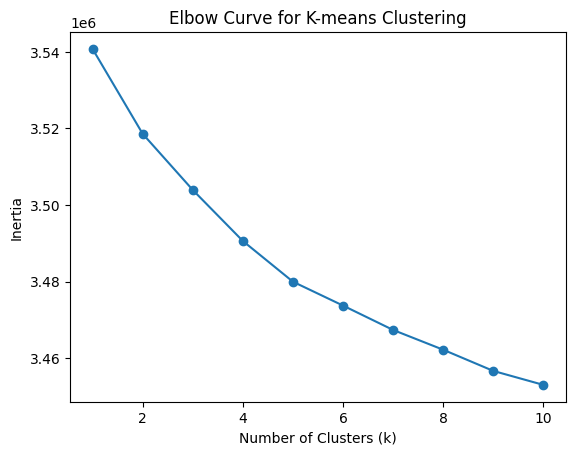

In [ ]:
inertia_values = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve

import matplotlib.pyplot as plt
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.show()

In [ ]:
import pickle
# Specify the path to the pickle file
file_path = '/content/gdrive/My Drive/AmazonReviews/cluster_labels.pkl'

# Load the pickle file
with open(file_path, 'rb') as file:
    cluster_labels = pickle.load(file)

# Print the loaded data
print(cluster_labels[:3])

[2 1 2]


In [ ]:
# Specify the path to the pickle file
file_path = '/content/gdrive/My Drive/AmazonReviews/X_train.pkl'

# Load the pickle file
with open(file_path, 'rb') as file:
    X_train = pickle.load(file)

# Print the loaded data
print(X_train[:3])

  (0, 6474)	0.13207612281842798
  (0, 1589)	0.14083004247998926
  (0, 466)	0.11345045941039433
  (0, 5544)	0.22059537448101754
  (0, 7677)	0.2059547907494724
  (0, 10346)	0.2175185369314462
  (0, 4972)	0.15481955397691505
  (0, 4875)	0.24297443197064578
  (0, 10593)	0.157612122877715
  (0, 11005)	0.10526382441623462
  (0, 2601)	0.22484439330549316
  (0, 763)	0.11968572500509156
  (0, 785)	0.09769800513339894
  (0, 1009)	0.09280513282583568
  (0, 3864)	0.10169819729268231
  (0, 2588)	0.18551989920185843
  (0, 8195)	0.28932619065735443
  (0, 7247)	0.21110629246585047
  (0, 4620)	0.36832047253468847
  (0, 5096)	0.15059839969318342
  (0, 8010)	0.10279823322322575
  (0, 8924)	0.1841188934598539
  (0, 12379)	0.14758692083171643
  (0, 12194)	0.08378964463072452
  (0, 7017)	0.13596636726521677
  :	:
  (2, 5335)	0.09918458570496333
  (2, 6860)	0.10392399071073642
  (2, 4124)	0.1670300692493594
  (2, 8494)	0.1809577441317981
  (2, 9530)	0.17535499681257932
  (2, 5762)	0.14805566446987595
  (2, 5

Using TSNE and PCA to visualize clusters.

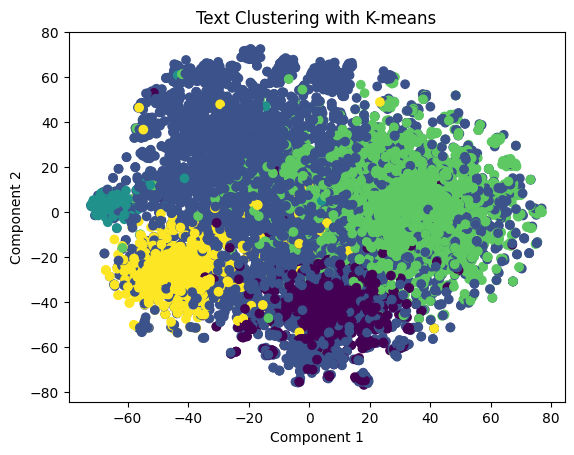

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

n_components = 2
tsne = TSNE(n_components=n_components)
X_tsne = tsne.fit_transform(X_train[:10000].toarray())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels[:10000], cmap='viridis')
plt.title('Text Clustering with K-means')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

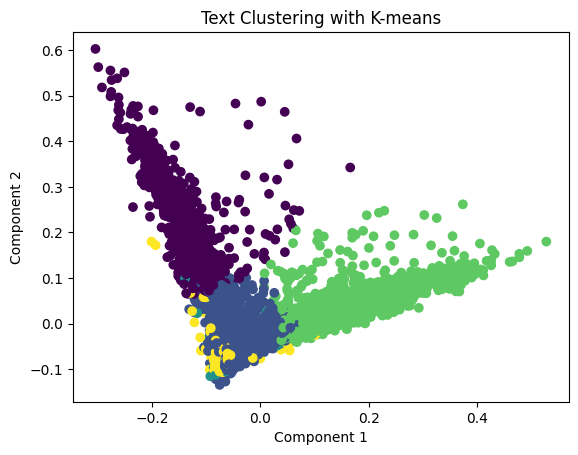

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train[:10000].toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels[:10000], cmap='viridis')
plt.title('Text Clustering with K-means')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

### Naive Bayes and Logistic Regression have been used here for a ML Model.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.842695


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.01,0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Best Hyperparameters:  {'alpha': 1.0, 'fit_prior': True}
Best Accuracy:  0.8421077777777779
Test Accuracy:  0.842695


In [ ]:
# Save the list to a file
with open('/content/gdrive/My Drive/AmazonReviews/NBmodel.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic regression classifier
classifier = LogisticRegression(solver='saga')
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8957575


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01,0.1, 1, 10]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Best Hyperparameters:  {'C': 10}
Best Accuracy:  0.8956141666666666
Test Accuracy:  0.8957175


In [ ]:
# Save the list to a file
with open('/content/gdrive/My Drive/AmazonReviews/LRmodel.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Train a Logistic regression classifier
classifier = xgb.XGBClassifier()
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8563325


Since it took 2 hrs for XGBoost to train I am not tuning the model.

In [ ]:
"""param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [3, 4, 5],                  # Maximum depth of a tree
    'learning_rate': [0.1, 0.01, 0.001],     # Learning rate
    'subsample': [0.8, 0.9],                 # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9]           # Subsample ratio of columns when constructing each tree
}"""

In [ ]:
"""# Perform grid search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate the model on the test set using the best hyperparameters
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)"""

Checking out and making for later use in an app.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess(text):
  pattern_non_alnum = re.compile(r'[^a-z0-9\s]', re.IGNORECASE)
  pattern_digits = re.compile(r'\d')
  # Convert to lowercase
  text = text.lower()

  # Remove non-alphanumeric characters
  text = pattern_non_alnum.sub(' ', text)

  # Remove digits
  text = pattern_digits.sub('', text)

  # Remove extra white spaces
  text = re.sub(r'\s+', ' ', text).strip()

  # Tokenize
  tokens = word_tokenize(text)

  # Removing stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # Join tokens back into a single string
  text = ' '.join(tokens)

  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
text = preprocess("I'm very disappointed with this product. It did not meet my expectations and stopped working after just a few days of use. I would not recommend it.")

In [ ]:
import pickle
# Specify the path to the pickle file
file_path = '/content/gdrive/My Drive/AmazonReviews/vectorizer.pkl'

# Load the pickle file
with open(file_path, 'rb') as file:
    vectorizer = pickle.load(file)


In [ ]:
# Specify the path to the pickle file
file_path = '/content/gdrive/My Drive/AmazonReviews/NBmodel.pkl'

# Load the pickle file
with open(file_path, 'rb') as file:
    model = pickle.load(file)


In [ ]:
preprocessed_text = vectorizer.transform([text])

In [ ]:
# Prediction
model.predict(preprocessed_text)

array([0])